## Introduction: 

## In this project we will analyse the sales dataset of a supermarket and predict how it can develop in the future and the steps to be taken for customer satisfaction

## Importing dataset and necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
super=pd.read_csv('C:/ML_Python_Internship/supermarket_sales.csv')

## General Inspection of the data

In [3]:
super.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## These show the beginning trends and demands in the supermarket when it either started or at the beginning of data collection

In [4]:
super.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


## These shows the ending trends and demands in the supermarket when the collection of data was paused for this session

In [5]:
super.shape

(1000, 17)

## Arranging the data interms of the date

In [6]:
super_data=super.sort_values(by='Date')
super_data=super_data.reset_index(drop=True)

In [7]:
super_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5
1,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0
2,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7
3,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0
4,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,9.0


In [8]:
super_data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,308-47-4913,A,Yangon,Member,Female,Sports and travel,52.26,10,26.1300,548.7300,3/9/2019,12:45,Credit card,522.60,4.761905,26.1300,6.2
996,841-35-6630,C,Naypyitaw,Normal,Female,Electronic accessories,75.91,6,22.7730,478.2330,3/9/2019,18:21,Cash,455.46,4.761905,22.7730,8.7
997,616-87-0016,B,Mandalay,Normal,Male,Fashion accessories,95.54,7,33.4390,702.2190,3/9/2019,14:36,Credit card,668.78,4.761905,33.4390,9.6
998,127-47-6963,A,Yangon,Normal,Male,Health and beauty,51.71,4,10.3420,217.1820,3/9/2019,13:53,Credit card,206.84,4.761905,10.3420,9.8
999,360-39-5055,C,Naypyitaw,Member,Male,Sports and travel,48.91,5,12.2275,256.7775,3/9/2019,10:17,Cash,244.55,4.761905,12.2275,6.6


In [9]:
len(super_data)

1000

In [10]:
super_data.shape

(1000, 17)

## Problem Statement:

## Predicting the supermarket sales in three different cities using linear regression and Random forest Classifier

## Data Cleaning

In [11]:
super_data.isnull()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
super_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Conclusion: There are no columns with nan values

## Data Visualization

In [13]:
super_data['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

## Plotting pie chart for the cities

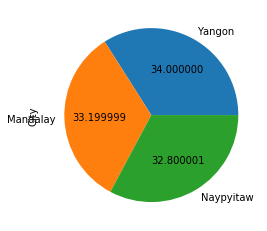

In [14]:
super_data['City'].value_counts().plot.pie(autopct='%2f')

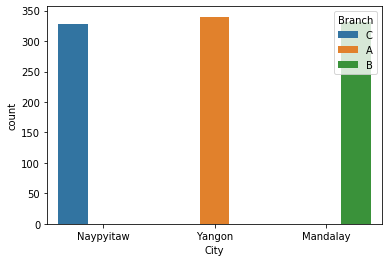

In [15]:
sns.countplot(x="City",hue="Branch",data=super_data)

## Inference: Yangon-Branch A,Mandalay-Branch B,Naypyitaw-Branch C

In [16]:
super_data[super_data['City']=='Mandalay'].Branch.value_counts()

B    332
Name: Branch, dtype: int64

In [17]:
super_data[super_data['City']=='Yangon'].Branch.value_counts()

A    340
Name: Branch, dtype: int64

In [18]:
super_data['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

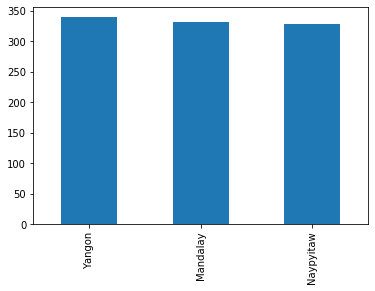

In [19]:
super_data['City'].value_counts().plot.bar()

## Bar plot for the City count

In [20]:
super_data['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

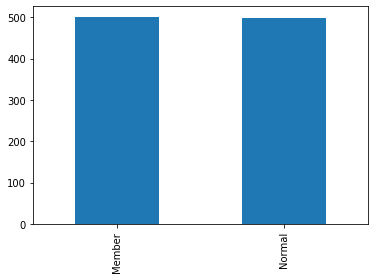

In [21]:
super_data['Customer type'].value_counts().plot.bar()

## Inference:No. of memebers and no.of non-members visiting the supermarket are almost same

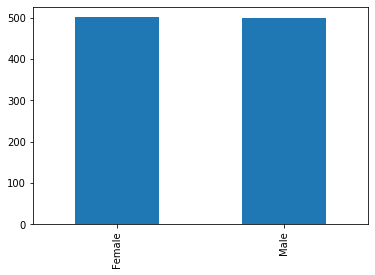

In [22]:
super_data['Gender'].value_counts().plot.bar()

## Inference: No.of females and males visiting the supermarket is almost equal

In [23]:
super_data['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

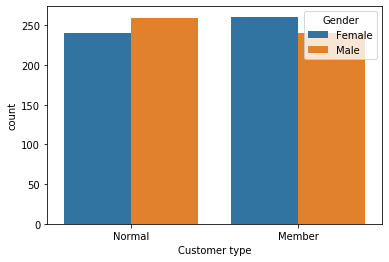

In [24]:
sns.countplot(x="Customer type",hue="Gender",data=super_data)

## Inference:No.of male non-member customers visiting the supermarket  is more than the number of female non-member customers visiting the supermarket 
## No. of female member customers visiting the supermarket is more than the number of male member customers visiting the supermarket

In [25]:
super_data['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

## Bar plot for the Product line

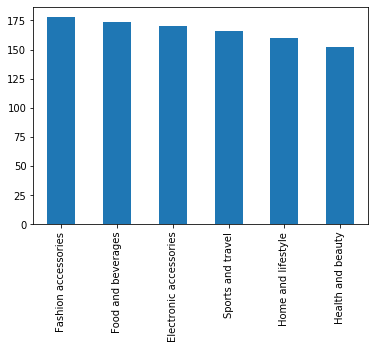

In [26]:
super_data['Product line'].value_counts().plot.bar()

## Inference:Fashion accessories are sold more as compared to other product lines

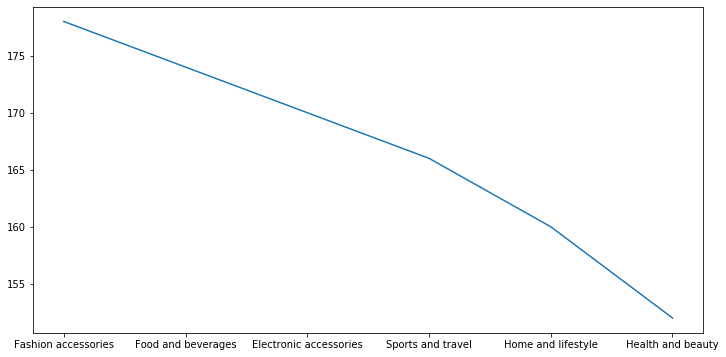

In [27]:
plt.figure(figsize=(12,6))
super_data['Product line'].value_counts().plot()
plt.show()

## A countplot between the gender and Product line

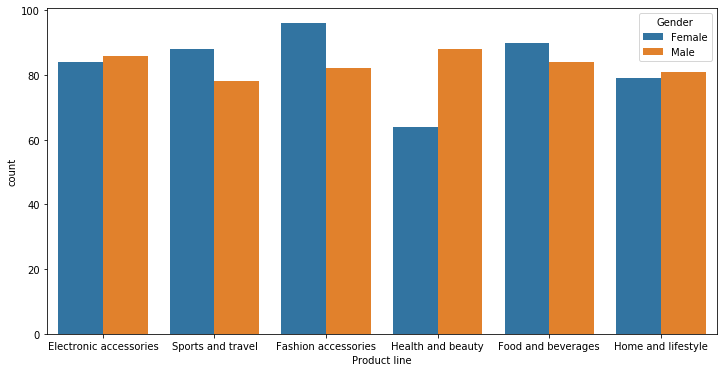

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x="Product line",hue="Gender",data=super_data)
plt.show()

In [29]:
super_data['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

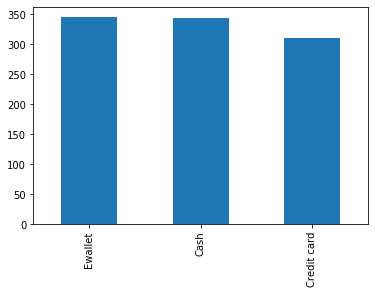

In [30]:
super_data['Payment'].value_counts().plot.bar()

## Inference:Payment via credit card are comparitively less than payment via Ewallet and cash

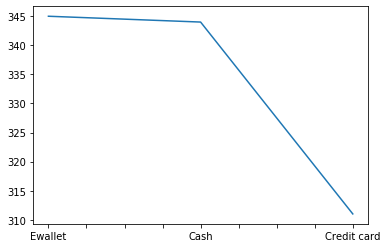

In [31]:
super_data['Payment'].value_counts().plot()

## A comparison plot of total,cogs and gross income for each day

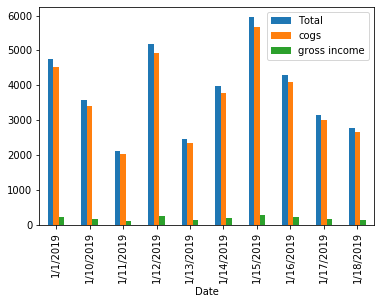

In [32]:
day_wise_sale=super_data.groupby('Date').sum()
day_wise_sale[['Total','cogs','gross income']].head(10).plot.bar()

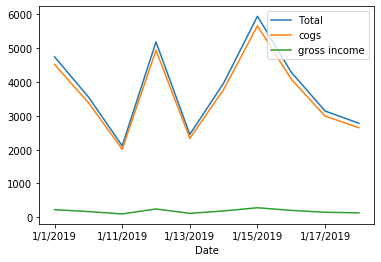

In [33]:
day_wise_sale[['Total','cogs','gross income']].head(10).plot()

## Comparison between Total cogs and gross income for the first 20 values

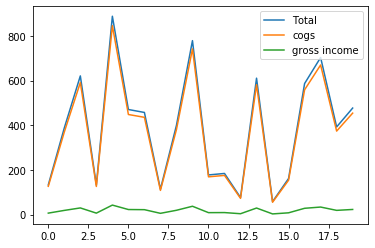

In [34]:
super_data[['Total','cogs','gross income']].head(20).plot()

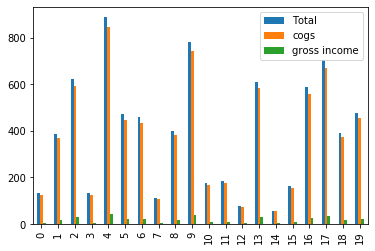

In [35]:
super_data[['Total','cogs','gross income']].head(20).plot.bar()

## A distplot for total,shows that the value reaches a maximum value around 180

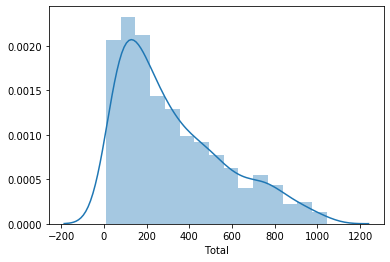

In [36]:
sns.distplot(super_data.Total)

## Scatter Plot between Total and cogs

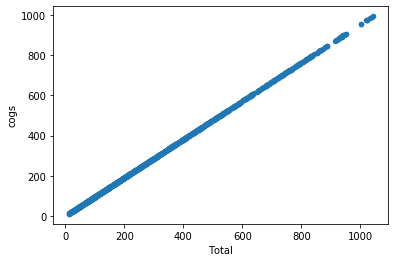

In [37]:
super_data.plot(kind='scatter',x='Total',y='cogs')

## Inference:There is a linear relationship between total and cost of goods sold or they are directly proportional

## Scatter Plot between Total and gross income

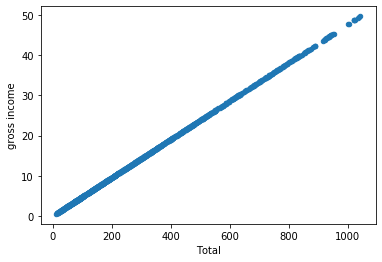

In [38]:
super_data.plot(kind='scatter',x='Total',y='gross income')

## Scatter Plot between cogs and gross income

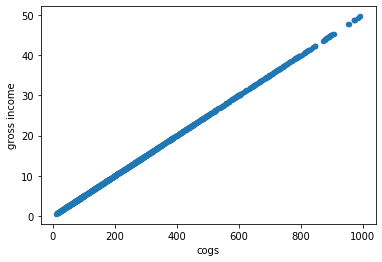

In [39]:
super_data.plot(kind='scatter',x='cogs',y='gross income')

## Scatter plot between gross income and gross margin percentage

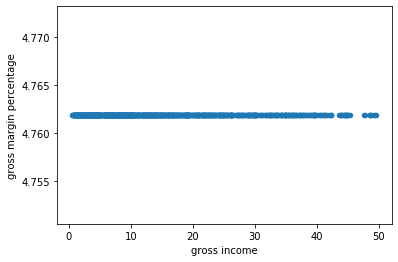

In [40]:
super_data.plot(kind='scatter',x='gross income',y='gross margin percentage')

## Inference:gmp remains constant through out

## Scatter plot between Total and Quantity

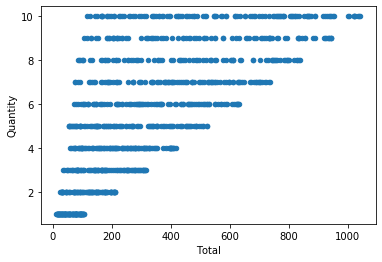

In [41]:
super_data.plot(kind='scatter',x='Total',y='Quantity')

## Scatter plot between quantity and unit price

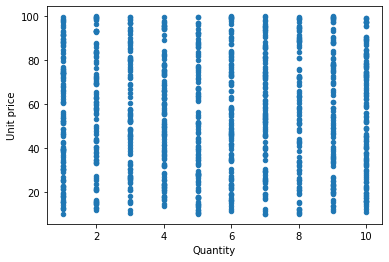

In [42]:
super_data.plot(kind='scatter',x='Quantity',y='Unit price')

## Scatter plot between Total and unit price

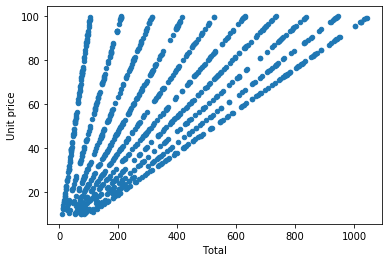

In [43]:
super_data.plot(kind='scatter',x='Total',y='Unit price')

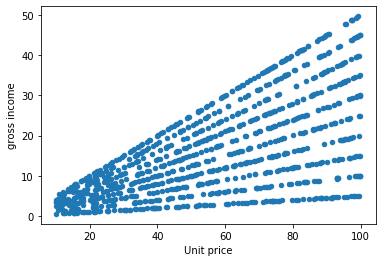

In [44]:
super_data.plot(kind='scatter',x='Unit price',y='gross income')

## Inference: The rate of variance of gross income increases with unit price

## Heatmap

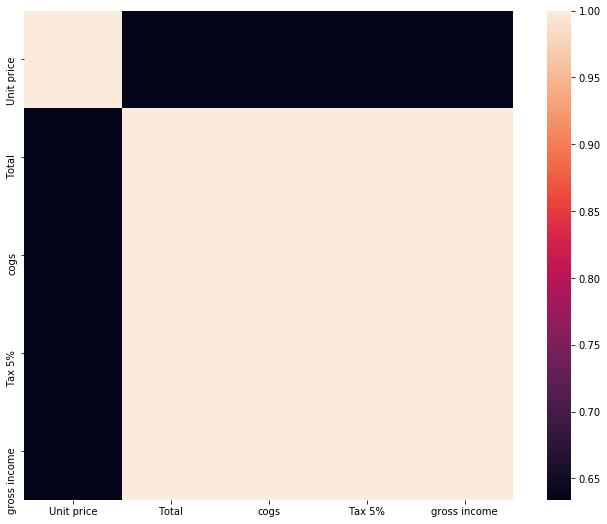

In [45]:
factors=['Unit price','Total','cogs','Tax 5%','gross income']
cormat=super_data[factors].corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(cormat,square=True)

## Inference:tax 5%,total,cogs and gross income are highly correlative

## Scatter plot between Unit price and cogs

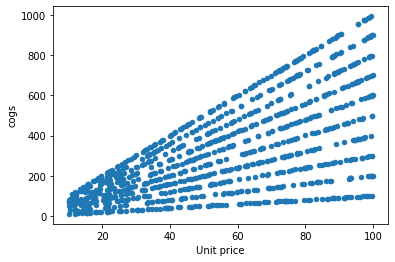

In [46]:
super_data.plot(kind='scatter',x='Unit price',y='cogs')

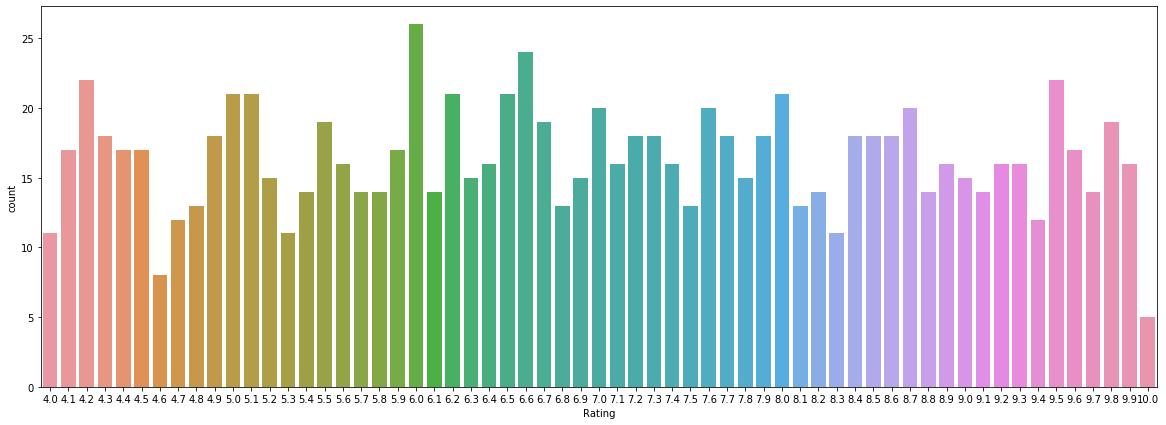

In [47]:
plt.figure(figsize=(20,7))
sns.countplot(super['Rating'])

## Inference: Maximum ratings are in 6.0 which denotes that satisfaction level of super-market commodities and services are above average and good

In [48]:
def scale(a):
    b=(a-a.min())/(a.max()-a.min())
    return b


## Scaling of data

In [49]:
scaled_super=super_data.copy()
scaled_super['Unit price']=scale(scaled_super['Unit price'])
scaled_super['Tax 5%']=scale(scaled_super['Tax 5%'])
scaled_super['Total']=scale(scaled_super['Total'])
scaled_super['cogs']=scale(scaled_super['cogs'])
scaled_super['gross income']=scale(scaled_super['gross income'])

In [50]:
scaled_super.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,0.591233,2,0.118301,0.118301,1/1/2019,15:51,Cash,0.118301,4.761905,0.118301,8.5
1,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,0.299288,10,0.365913,0.365913,1/1/2019,19:48,Credit card,0.365913,4.761905,0.365913,7.0
2,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,0.619270,9,0.591649,0.591649,1/1/2019,13:55,Cash,0.591649,4.761905,0.591649,7.7
3,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,0.587339,2,0.117589,0.117589,1/1/2019,11:43,Cash,0.117589,4.761905,0.117589,5.0
4,746-04-1077,B,Mandalay,Member,Female,Food and beverages,0.829439,10,0.850737,0.850737,1/1/2019,11:36,Credit card,0.850737,4.761905,0.850737,9.0


## Boxplot for City and gross income

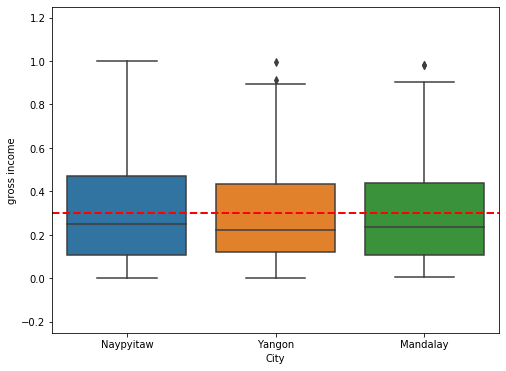

In [51]:
var='City'
data_plt=pd.concat([scaled_super['gross income'],scaled_super[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='gross income',data=data_plt)
fig.axis(ymin=-0.25,ymax=1.25)
plt.axhline(scaled_super['gross income'].mean(),color='r',linestyle='dashed',linewidth=2)

## Inference: It is visible that opening a branch in naypyitaw is more profitable

## Box plot for product line and gross income

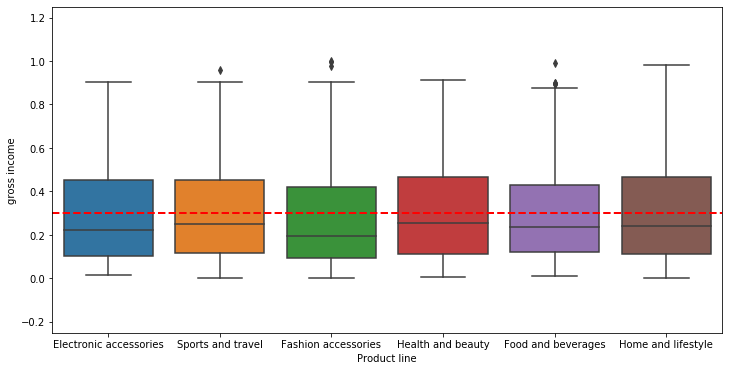

In [52]:
var='Product line'
data_plt=pd.concat([scaled_super['gross income'],scaled_super[var]],axis=1)
f,ax=plt.subplots(figsize=(12,6))
fig=sns.boxplot(x=var,y='gross income',data=data_plt)
fig.axis(ymin=-0.25,ymax=1.25)
plt.axhline(scaled_super['gross income'].mean(),color='r',linestyle='dashed',linewidth=2)

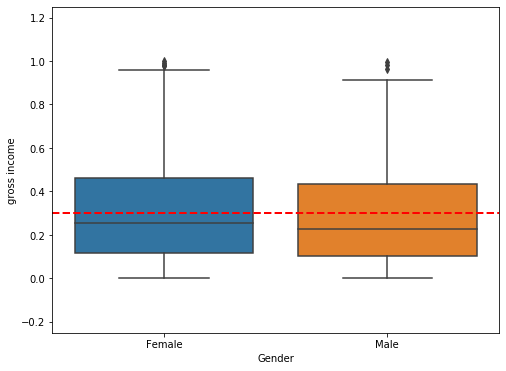

In [53]:
var='Gender'
data_plt=pd.concat([scaled_super['gross income'],scaled_super[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='gross income',data=data_plt)
fig.axis(ymin=-0.25,ymax=1.25)
plt.axhline(scaled_super['gross income'].mean(),color='r',linestyle='dashed',linewidth=2)

## Box plot b/w Payment and gross income

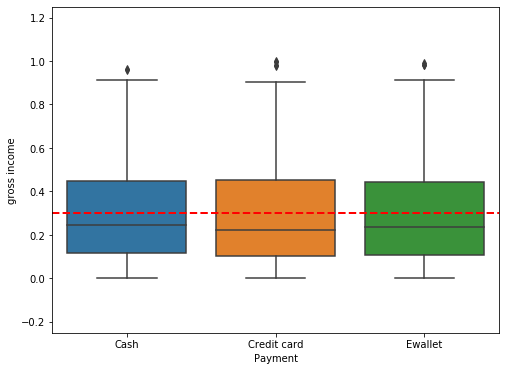

In [54]:
var='Payment'
data_plt=pd.concat([scaled_super['gross income'],scaled_super[var]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='gross income',data=data_plt)
fig.axis(ymin=-0.25,ymax=1.25)
plt.axhline(scaled_super['gross income'].mean(),color='r',linestyle='dashed',linewidth=2)

## Conclusion from data analysis
## 1.The gross percent spreads with unit price,i.e for a unit price of higher value,there area wide range of gross percentages of the commodities in sale
## 2.Branch C of the supermarke makes the greatest profit
## 3.City of Naypyyitaw draws maximum percentage of customers
## 4.Most people have voted upto a rating of 6.0 which says that the services and facilities are good for all branches.
## 5.From the heatmap we can analyse that tax 5%,total,cogs and gross income are highly correlative.
## 6.Mode of payment doesn't matter at all.
## 7.The survey was performed on equal no.of men and women

In [55]:
super_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Transforming the data

## Converting all categorical variables to 0 and 1 

In [56]:
Customer_type=pd.get_dummies(super_data['Customer type'],drop_first=True)
Customer_type

,Normal
0,1
1,0
2,1
3,1
4,0
...,...
995,0
996,1
997,1
998,1


In [57]:
Gender=pd.get_dummies(super_data['Gender'],drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,1
998,1


In [58]:
Product=pd.get_dummies(super_data['Product line'],drop_first=True)
Product

,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,0,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
995,0,0,0,0,1
996,0,0,0,0,0
997,1,0,0,0,0
998,0,0,1,0,0


In [59]:
City=pd.get_dummies(super_data['City'],drop_first=True)
City

,Naypyitaw,Yangon
0,1,0
1,1,0
2,0,1
3,1,0
4,0,0
...,...,...
995,0,1
996,1,0
997,0,0
998,0,1


In [60]:
super_data2=pd.concat([super_data,Gender,Product,City,Customer_type],axis=1)
super_data2.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Rating,Male,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Naypyitaw,Yangon,Normal
0,556-97-7101,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,...,8.5,0,0,0,0,0,0,1,0,1
1,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,...,7.0,0,0,0,0,0,1,1,0,0
2,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,...,7.7,0,1,0,0,0,0,0,1,1
3,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,...,5.0,1,0,0,1,0,0,1,0,1
4,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,...,9.0,0,0,1,0,0,0,0,0,0


In [61]:
super_data2.drop(['City','Branch','Gender','Customer type','Product line','Invoice ID'],axis=1,inplace=True)
super_data2.head()

,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Male,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Naypyitaw,Yangon,Normal
0,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,8.5,0,0,0,0,0,0,1,0,1
1,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,7.0,0,0,0,0,0,1,1,0,0
2,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7,0,1,0,0,0,0,0,1,1
3,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0,1,0,0,1,0,0,1,0,1
4,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,9.0,0,0,1,0,0,0,0,0,0


## Converting Date to a continous variable i.e into no.of days

In [62]:
month=pd.DataFrame(super_data2['Date'])
month=month.reset_index()
month.head()

,index,Date
0,0,1/1/2019
1,1,1/1/2019
2,2,1/1/2019
3,3,1/1/2019
4,4,1/1/2019


In [63]:
import pandas as pd
import time
from datetime import datetime, timedelta
import datetime as dt
from datetime import date


data = {'col': ['id','Number of Days']}
ColumnList=pd.DataFrame(data=data)
today = date(2020, 8, 27)
dates=pd.DataFrame(month[['index','Date']])

for i in range(1,2):
    for j in range(0,len(dates)):
            #print (dates.iloc[j][i])
            tdate=datetime.strptime(dates.iloc[j][i],'%m/%d/%Y').date() #convert datetime to date variable
            
            NumDays = (today-tdate).days #Calculate number of days between today and the date field
           
            dates.at[j,ColumnList.iloc[i][0]]=NumDays
            
        

In [64]:
dates.head()

,index,Date,Number of Days
0,0,1/1/2019,604.0
1,1,1/1/2019,604.0
2,2,1/1/2019,604.0
3,3,1/1/2019,604.0
4,4,1/1/2019,604.0


In [65]:
super_data2['Number of Days']=pd.Series(dates['Number of Days'])
super_data2['Date']=pd.Series(dates['Date'])

In [66]:
super_data2.head()

,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,...,Male,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Naypyitaw,Yangon,Normal,Number of Days
0,63.22,2,6.322,132.762,1/1/2019,15:51,Cash,126.44,4.761905,6.322,...,0,0,0,0,0,0,1,0,1,604.0
1,36.98,10,18.490,388.290,1/1/2019,19:48,Credit card,369.80,4.761905,18.490,...,0,0,0,0,0,1,1,0,0,604.0
2,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,...,0,1,0,0,0,0,0,1,1,604.0
3,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,...,1,0,0,1,0,0,1,0,1,604.0
4,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,...,0,0,1,0,0,0,0,0,0,604.0


## Importing the libraries required for regression

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

## Linear regression model

## Considering sum of gross margin percentage of each product of a day as dependent variable and corresponding sums of Unit price,gender,no.of days,product line,city and member as independent variable

In [68]:
month_wise=super_data2.groupby('Date').sum()

In [69]:
month_wise=month_wise.reset_index()
month_wise.head(20)

,Date,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Male,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Naypyitaw,Yangon,Normal,Number of Days
0,1/1/2019,659.95,81,225.9610,4745.1810,4519.22,57.142857,225.9610,79.0,4,1,2,1,1,4,4,5,6,7248.0
1,1/10/2019,522.46,55,169.5690,3560.9490,3391.38,42.857143,169.5690,54.6,4,1,1,1,1,3,3,3,4,5355.0
2,1/11/2019,479.70,40,100.7125,2114.9625,2014.25,38.095238,100.7125,56.8,5,1,4,0,1,2,2,6,4,4752.0
3,1/12/2019,625.90,80,246.8935,5184.7635,4937.87,52.380952,246.8935,75.3,5,3,0,2,2,2,2,3,6,6523.0
4,1/13/2019,531.50,50,116.7240,2451.2040,2334.48,47.619048,116.7240,67.2,5,2,2,1,1,2,3,4,4,5920.0
5,1/14/2019,732.64,64,188.8865,3966.6165,3777.73,61.904762,188.8865,93.5,7,3,4,3,0,1,6,2,8,7683.0
6,1/15/2019,825.67,88,283.0600,5944.2600,5661.20,61.904762,283.0600,85.3,6,1,2,2,3,2,3,5,7,7670.0
7,1/16/2019,612.12,61,204.2420,4289.0820,4084.84,47.619048,204.2420,68.6,5,2,2,0,2,4,5,2,5,5890.0
8,1/17/2019,667.55,47,149.6550,3142.7550,2993.10,52.380952,149.6550,72.5,6,0,3,1,3,4,3,4,5,6468.0
9,1/18/2019,450.94,54,132.4035,2780.4735,2648.07,42.857143,132.4035,68.6,4,3,1,1,1,2,3,4,4,5283.0


In [70]:
factors=['Date','Unit price','gross income','Male','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle',
        'Sports and travel','Naypyitaw','Yangon','Normal','Number of Days','gross margin percentage']
super_final=pd.DataFrame(month_wise[factors].copy())

In [71]:
super_final.head()

,Date,Unit price,gross income,Male,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel,Naypyitaw,Yangon,Normal,Number of Days,gross margin percentage
0,1/1/2019,659.95,225.9610,4,1,2,1,1,4,4,5,6,7248.0,57.142857
1,1/10/2019,522.46,169.5690,4,1,1,1,1,3,3,3,4,5355.0,42.857143
2,1/11/2019,479.70,100.7125,5,1,4,0,1,2,2,6,4,4752.0,38.095238
3,1/12/2019,625.90,246.8935,5,3,0,2,2,2,2,3,6,6523.0,52.380952
4,1/13/2019,531.50,116.7240,5,2,2,1,1,2,3,4,4,5920.0,47.619048


In [72]:
factors=['Unit price','Number of Days','Male','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle',
        'Sports and travel','Naypyitaw','Yangon','Normal']
x3=pd.DataFrame(super_final[factors].copy())
y3=super_final['gross margin percentage'].copy()

In [73]:
X3=StandardScaler().fit_transform(x3)
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.25,random_state=0)

In [74]:
regressor3=LinearRegression()
regressor3.get_params()
regressor3.fit(X3_train,y3_train)
y3_predicted=regressor3.predict(X3_test)

In [75]:
y3_predicted

array([41.3714892 , 42.21832721, 51.97829596, 44.14829017, 42.89909822,
       39.20692816, 50.13120474, 48.6445655 , 46.23866654, 74.9038122 ,
       50.09457577, 61.7793525 , 42.73156513, 44.78912367, 55.43599741,
       65.19667299, 67.93142563, 95.41168632, 55.79665576, 66.24123504,
       41.67823721, 66.09513316, 49.55804952])

In [76]:
y3_test

2     38.095238
13    38.095238
53    52.380952
41    42.857143
66    42.857143
30    38.095238
45    52.380952
43    47.619048
78    47.619048
88    76.190476
7     47.619048
26    57.142857
33    38.095238
63    47.619048
8     52.380952
16    61.904762
24    66.666667
56    95.238095
77    61.904762
42    66.666667
22    38.095238
6     61.904762
61    52.380952
Name: gross margin percentage, dtype: float64

## Accuracy test

In [77]:
r=r2_score(y3_test,y3_predicted)
r #perfecto

0.9554539828638692

In [78]:
rmse1=sqrt(mean_squared_error(y3_test,y3_predicted))
print(rmse1) #almost equal to 0 that's a good sign

2.9136812440771642


## Random Forest Classifier

In [79]:
factors=['Unit price','Number of Days','Male','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle',
        'Sports and travel','Naypyitaw','Yangon','Normal']
x4=pd.DataFrame(super_final[factors].copy())
y4=super_final['gross margin percentage'].copy().astype(int)

In [80]:
X4=StandardScaler().fit_transform(x4)
X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size=0.25,random_state=0)

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=5)
model=clf.fit(X4_train,y4_train)
y_pred=model.predict(X4_test)


In [82]:
y_pred

array([42, 42, 52, 42, 42, 42, 42, 47, 47, 76, 52, 57, 42, 42, 57, 66, 66,
       85, 57, 61, 42, 66, 52])

In [83]:
y4_test

2     38
13    38
53    52
41    42
66    42
30    38
45    52
43    47
78    47
88    76
7     47
26    57
33    38
63    47
8     52
16    61
24    66
56    95
77    61
42    66
22    38
6     61
61    52
Name: gross margin percentage, dtype: int32

## Accuracy score

In [84]:
from sklearn.metrics import accuracy_score
print('Correct Prediction(%):',accuracy_score(y4_test,y_pred,normalize=True)*100)

Correct Prediction(%): 39.130434782608695
